**Ануфриева Виктория, 5130901/10202**

### *Упражнение 2.2.*

Необходимо написать класс, наследующийся от Sinusoid из thinkdsp и позволяющий построить пилообразный сигнал - нарастает от -1 до 1, а затем резко падает до -1.

Перепишем функцию *evaluate* так, что:

*cycles* – число циклов со старта

*frac* – дробная часть, растущая от 0 до 1 за период

*unbias* – сдвиг frac - он растет от -0.5 до 0.5

*normalize* – нормализует функцию - она растёт от -self.amp до self.amp

Создадим экземпляр этого класса и получим wave - выведем его часть на экран.

Код и результат его выполнения выглядят так:

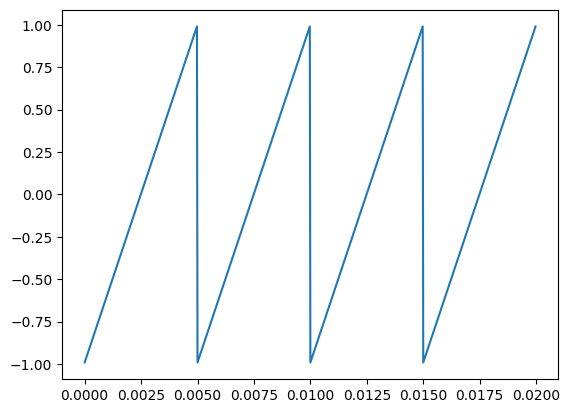

In [23]:
from thinkdsp import Sinusoid
from thinkdsp import normalize, unbias
import numpy as np

class SawtoothSignal(Sinusoid):

    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

sawtooth = SawtoothSignal(200).make_wave(duration=0.5, framerate=40000)
sawtooth.segment(start=0, duration=0.005 * 4).plot()

Рассмотрим спектр полученного сигнала, выделим наибольшие 10 пиков, чтобы изучить, каким образом частота зависит от амплитуды:

График и массив пиков будут выглядеть таким образом:


[(6336.586158412468, 200.0),
 (3168.5475316442266, 400.0),
 (2112.647887262727, 600.0),
 (1584.7831474372117, 800.0),
 (1268.1325475795675, 1000.0),
 (1057.0892087347524, 1200.0),
 (906.3930765164864, 1400.0),
 (793.414155861169, 1600.0),
 (705.5802559636873, 1800.0),
 (635.3480882678591, 2000.0)]

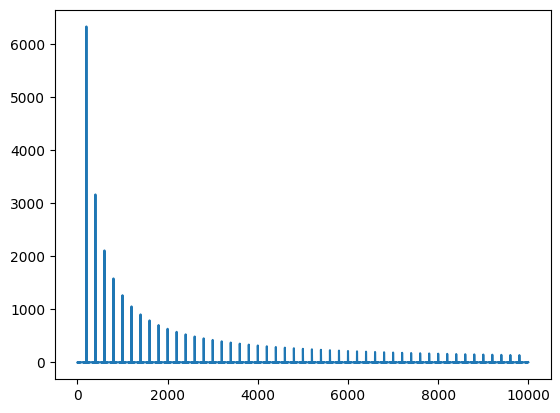

In [24]:
spectrum = sawtooth.make_spectrum()
spectrum.plot(high=10000)
spectrum.peaks()[:10]

Из полученных результатов видно, наш сигнал содержит и чётные, и нечётные гармоники, кратные основной частоте.

Амплитуда гармоник уменьшается пропорционально частоте - 1⁄f.

Теперь сравним полученный спектр пилообразного сигнала со спектром прямоугольного:

Прямоугольный сигнал задаётся с amp=0.5 для корректного сравнения.

Код, полученный график и массив пиков выглядят так:


[(6366.413115308202, 200.0),
 (2122.71230545574, 600.0),
 (1274.3176165995214, 1000.0),
 (910.9676790136105, 1400.0),
 (709.300517302879, 1800.0),
 (581.126830719483, 2200.0),
 (492.52793850539985, 2600.0),
 (427.6753695820614, 3000.0),
 (378.18956596178754, 3400.0),
 (339.2194055744896, 3800.0)]

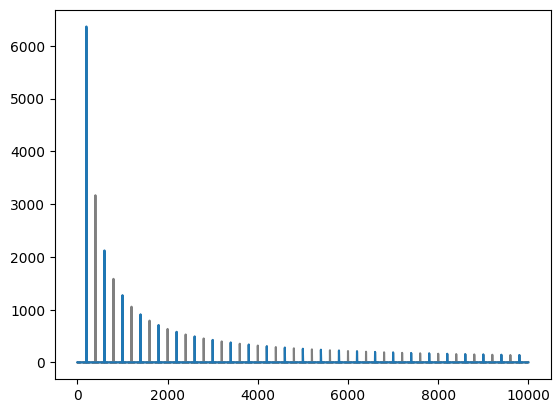

In [25]:
from thinkdsp import SquareSignal

sawtooth.make_spectrum().plot(high=10000, color='gray')
square = SquareSignal(freq=200, amp=0.5).make_wave(duration=0.5, framerate=40000)
sqere_spectrum = square.make_spectrum()
sqere_spectrum.plot(high=10000)
sqere_spectrum.peaks()[:10]

В отличии от пилообразного сигнала, прямоугольный сигнал имеет только нечетные гармоники, однако зависимость снижения амплитуды от частоты сохраняется - 1⁄f.

По аналогии сравним полученные данные с данными треугольного сигнала:

Треугольный сигнал задаётся с amp=0.78 для корректного сравнения.

Код, полученный график и массив пиков выглядят так:


[(6322.961884943854, 200.0),
 (703.0137709503831, 600.0),
 (253.4183165242379, 1000.0),
 (129.55068550436079, 1400.0),
 (78.57692291999746, 1800.0),
 (52.774705367603474, 2200.0),
 (37.93526415250758, 2600.0),
 (28.62556659255658, 3000.0),
 (22.404462257168767, 3400.0),
 (18.043085598456827, 3800.0)]

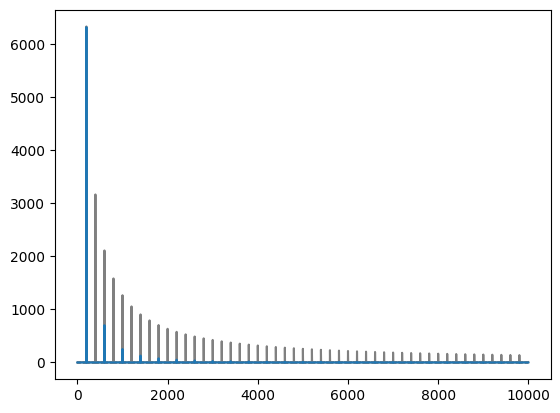

In [26]:
from thinkdsp import TriangleSignal

sawtooth.make_spectrum().plot(high=10000, color='gray')
triangle = TriangleSignal(freq=200, amp=0.78).make_wave(duration=0.5, framerate=40000)
triangle_spectrum = triangle.make_spectrum()
triangle_spectrum.plot(high=10000)
triangle_spectrum.peaks()[:10]

Можно заметить, что треугольный сигнал отличается от представленных ранее - в нём так же, как и в прямоугольном присутствуют только нечётные гармоники, но выделяет его то, что его амплитуда спадает пропорционально квадрату частоты - 1⁄f^2.

### *Упражнение 2.3.*

Необходимо создать прямоугольный сигнал с частотой 1100 Гц и выборкой wave 10000 кадров в секунду.
Отобразим получившийся спектр, а также первые 10 пиков:


[(3183.6225209097624, 1100.0),
 (1062.6053796283115, 3300.0),
 (639.2453221499661, 4500.0),
 (458.4143857027373, 2300.0),
 (358.4343652372162, 100.0),
 (295.21347928093405, 2100.0),
 (251.7953698310349, 4300.0),
 (220.26892645852666, 3500.0),
 (196.44766988672484, 1300.0),
 (177.90954854798676, 900.0)]

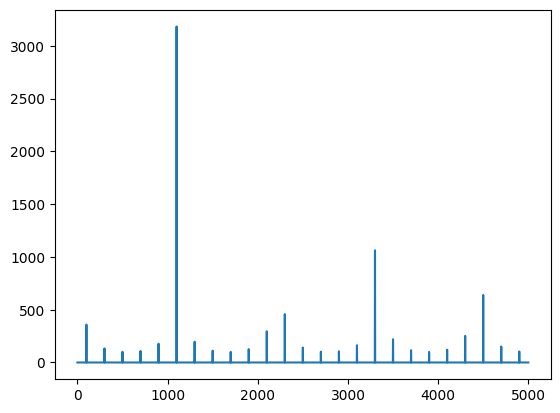

In [39]:
from thinkdsp import SquareSignal

square = SquareSignal(1100).make_wave(duration=0.5, framerate=10000)
square_spectrum = square.make_spectrum()
square_spectrum.plot()
square_spectrum.peaks()[:10]

В предыдущем пункте работы мы выяснили, что, прямоугольный сигнал имеет только нечетные гармоники, а зависимость падения амплитуды от частоты пропорциональна 1⁄f.

Тогда, ожидаем увидеть гармоники на 3300, 5500, 7700 и 9900 Гц.
Пики и правда есть на 1100 и 3300 Гц, однако дальше наблюдается эффект *биения* - вместо 5500 получаем 4500 (10000 – 5500), а следующая гармоника - вместо 7700 получается 2300 (10000 – 7700).

Как следствие, сигнал звучит совершенно не так, как задумывалось - появляются лишние низкие частоты (100), посторонние не кратные частоты (2300), которые сильно выбиваются.

Для демонстрации создадим аудиофайл исходного прямоугольного сигнала и две синусоиды на 2300 и 100 Гц и убедимся, что они достаточно заметны:
*(Осторожно, резкий звук)*

In [28]:
square.make_audio()

In [29]:
from thinkdsp import SinSignal

SinSignal(2300).make_wave(duration=0.5, framerate=10000).make_audio()

In [30]:
SinSignal(100).make_wave(duration=0.5, framerate=10000).make_audio()

Как и ожидалось, выделенные частоты очень искажают исходны сигнал

### *Упражнение 2.4.*

Создадим треугольный сигнал с частотой 400 Гц и wave длительностью  0.01.

График выглядит следующим образом:


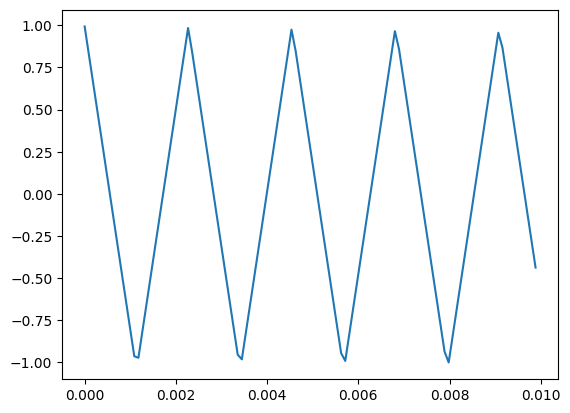

In [58]:
from thinkdsp import TriangleSignal

triangle = TriangleSignal().make_wave(duration=0.01)
triangle.plot()

Получим спектр этого сигнала и выведем первый элемент массива hs, который является результатом БПФ.

Результат примерно равен нулю:


In [59]:
spectrum = triangle.make_spectrum()
spectrum.hs[0]

(1.0436096431476471e-14+0j)

Заменим его значение на 100 повторим вычисление.

Получаем следующий график:


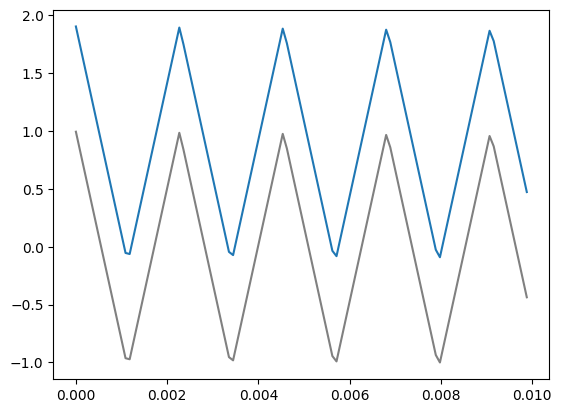

In [60]:
spectrum.hs[0] = 100
triangle.plot(color='gray')
spectrum.make_wave().plot()

 Из полученного графика видно, компоненте Spectrum.hs[0] мы самостоятельно задали значение, и получившийся сигнал отличается от исходного только вертикальным смещением.

### *Упражнение 2.5.*
Необходимо написать функцию filter_spectrum, которая принимает спектр и изменяет его делением каждого элемента hs на соответствующую частоту из fs.

Получившийся код и его результат представлены ниже:

In [62]:
from thinkdsp import TriangleSignal

def filter_spectrum(spectrum):
    spectrum.hs[1:] /= spectrum.fs[1:]
    spectrum.hs[0] = 0


Для сравнения создадим пилообразный сигнал и выведем его в виде аудио. Далее вызовем функцию фильтрации.

Ниже представлени спектрограмма и аудиофайл "До" и "После" фильтрации:

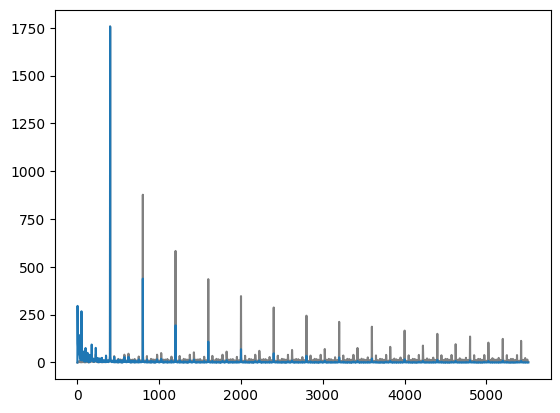

In [92]:
wave = SawtoothSignal(freq=400).make_wave(duration=0.5)
spectrum = wave.make_spectrum()
spectrum.plot(high=10000, color='gray')
filter_spectrum(spectrum)
spectrum.scale(400)
spectrum.plot(high=10000)

In [93]:
wave.make_audio()

In [94]:
filtered = spectrum.make_wave()
filtered.make_audio()

Исходя из результатов, делаем вывод: чем больше частота, тем меньше пик после использования функции, т.к. деление происходит именно на частоту.

По "выходу" фукция фильтрации схожа с low_pass, что слышно на аудиозаписи.


### *Упражнение 2.6.*
Необходимо создать сигнал, в котором есть и четные, и нечетные гармоники, спадающие пропорционально 1⁄f^2.

Попробуем собрать необходимый сигнал из нескольких синусоид: частоты будут изменяться в пределах от 600 до 9000 Гц с шагом 600, а амплитуда по заданию вычисляется путем деления 1⁄f^2.

Получившийся код и его результат представлены ниже:

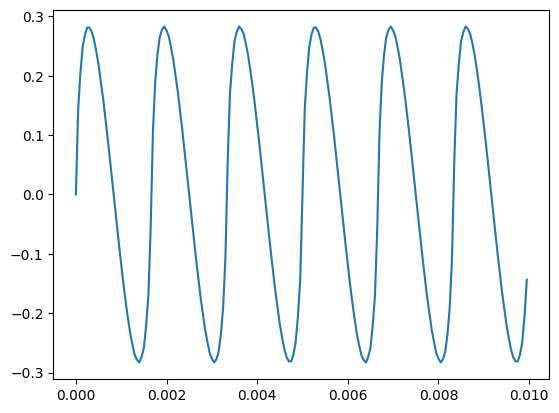

In [99]:
from thinkdsp import SinSignal
import numpy as np

freqs = np.arange(600, 9600, 600)
amps = (1 / freqs**2) * 10 ** 5
signal = sum(SinSignal(freq, amp) for freq, amp in zip(freqs, amps))
wave = signal.make_wave(duration=0.5, framerate=20000)
wave.segment(duration=0.01).plot()
wave.make_audio()

Чтобф убедиться, что полученный сигнал соответствует требованиям, выведем его спектрограмму и массив первых 10 пиков сигнала:


[(1388.8888888888887, 600.0),
 (347.2222222222215, 1200.0),
 (154.32098765432173, 1800.0),
 (86.80555555555657, 2400.0),
 (55.555555555555244, 3000.0),
 (38.58024691357977, 3600.0),
 (28.344671201814908, 4200.0),
 (21.70138888888805, 4800.0),
 (17.14677640603355, 5400.0),
 (13.888888888888896, 6000.0)]

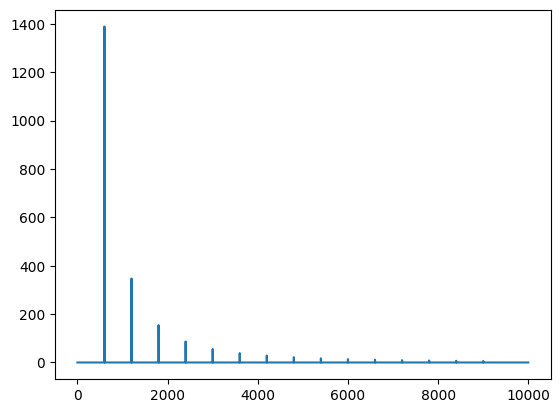

In [100]:
spectrum = wave.make_spectrum()
spectrum.plot()
spectrum.peaks()[:10]

Как видно из полученных результатов, составленный сигнал соответствует требования задания.